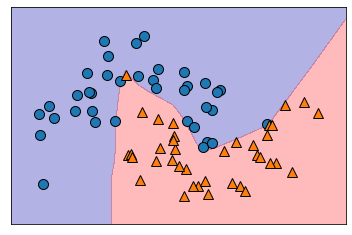

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
X, y = make_moons(n_samples=100, noise = 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

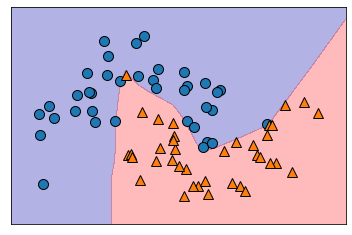

In [2]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter = 1000)   # max iteration은 그냥 충분히 큰 값으로 주기만 하면 됨.
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

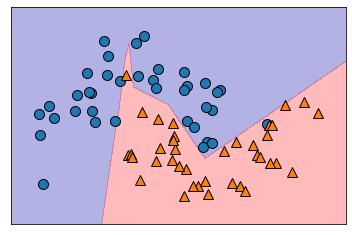

In [3]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes = [10], max_iter = 1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

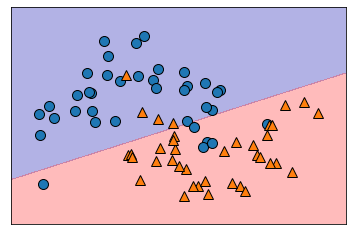

In [4]:
# hidden layer size를 조정하면 p.147 의 2-44번과 같이 되므로 선형 회귀가 된다.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes = [1], max_iter = 1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

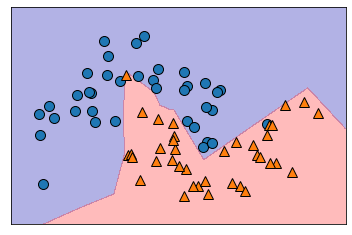

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes = [10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

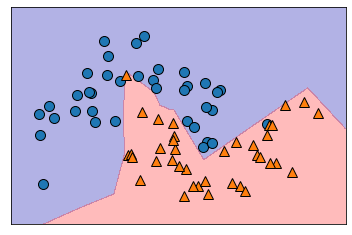

In [6]:
# relu함수
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation = 'relu', hidden_layer_sizes = [10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

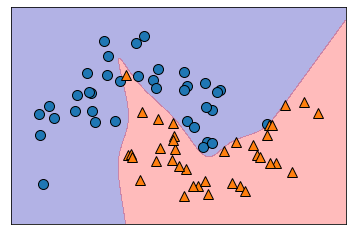

In [7]:
# 하이퍼볼릭탄젠트 => 더 매끄러운 곡선.(급격한 변화 x)
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation = 'tanh', hidden_layer_sizes = [10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


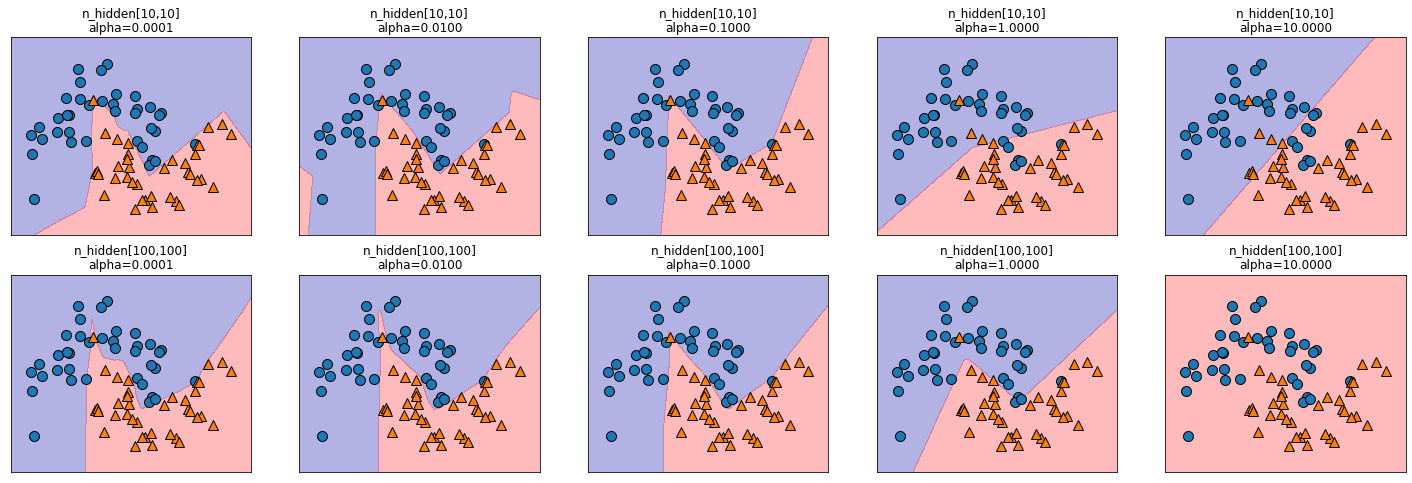

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize = (25, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1, 10]):
        mlp = MLPClassifier(solver='lbfgs', random_state = 0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state = 0)

In [11]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [12]:
mlp.score(X_train, y_train)

0.9389671361502347

In [13]:
mlp.score(X_test, y_test)

0.916083916083916

In [14]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis = 0)

In [15]:
# 스케일 적용할 때는 같은 기준으로 움직여야 함.(동일한 것을 빼 주고, 동일한 것을 나눠 주고, ...)
X_train_s = X_train-train_mean / train_std
X_test_s = X_test-train_mean / train_std

In [16]:
X_train_s

array([[  7.85948823,  12.78927538,  71.76493767, ...,  -1.66747319,
         -4.27170391,  -4.62997856],
       [  7.22948823,  15.18927538,  68.16493767, ...,  -1.73865319,
         -4.25260391,  -4.63482856],
       [ 16.13948823,  23.57927538, 127.42493767, ...,  -1.59607319,
         -4.32460391,  -4.63367856],
       ...,
       [  5.44548823,  13.64927538,  56.04493767, ...,  -1.70835319,
         -4.33640391,  -4.61868856],
       [  5.72948823,  13.54927538,  56.95493767, ...,  -1.75887319,
         -4.39090391,  -4.63445856],
       [  7.51948823,  19.25927538,  70.74493767, ...,  -1.66234319,
         -4.37060391,  -4.61272856]])

In [17]:
mlp = MLPClassifier(random_state = 0).fit(X_train_s, y_train)

In [18]:
mlp.score(X_train_s, y_train)

0.9272300469483568

In [19]:
mlp.score(X_test_s,y_test)

0.9440559440559441

In [20]:
mpl = MLPClassifier(random_state=42, max_iter=1000).fit(X_train_s, y_train)

In [21]:
mlp.score(X_train_s, y_train)

0.9272300469483568

In [22]:
mlp.score(X_test_s, y_test)

0.9440559440559441

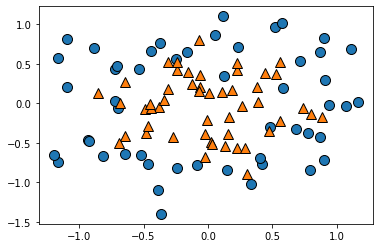

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)   # factor은 가운데로 모이는 정도, noise는 데이터의 규칙성 정도.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [25]:
print(X_test.shape)

(25, 2)


In [26]:
print(gbrt.decision_function(X_test)>0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]


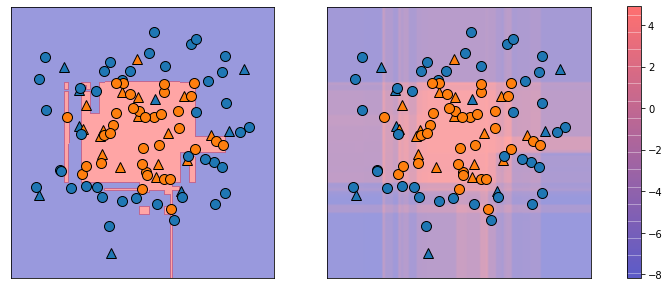

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (13,5))
mglearn.tools.plot_2d_separator(gbrt, X,  ax=axes[0], alpha = .4,
                               fill = True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4, cm=mglearn.ReBl)   # cm=mglearn.ReBl => 그라데이션 그리는 도구.

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = "^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax=ax)
cbar = plt.colorbar(scores_image, ax = axes.tolist())

In [28]:
# 안경책 p.309~

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [30]:
boston = load_boston()

In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# df.to_csv('my_boston.csv')       # 작업 디렉토리에 my_boston.csv라는 csv 파일로 저장됨.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
# 가격정보는 여기에 들어있음. boston.target

In [36]:
df['PRICE'] = boston.target
# df.to_csv('my_boston.csv')

In [37]:
df.shape

(506, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
y = df['PRICE']

In [45]:
X = df.drop(['PRICE'], axis = 1, inplace = False)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 156)

In [49]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
234,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32


In [50]:
lr = LinearRegression().fit(X_train, y_train)

In [51]:
y_predict = lr.predict(X_test)

In [52]:
print(y_test[:10])

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
135    18.1
201    24.1
209    20.0
392     9.7
456    12.7
Name: PRICE, dtype: float64


In [54]:
print(y_predict[:10])

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641 17.66341192
 30.32844101 17.8513932  10.86187069 12.83177966]


In [55]:
# 평균제곱오차
mse = mean_squared_error(y_test, y_predict)
mse

17.29691590790215

In [57]:
# 평균제곱근오차
rmse = np.sqrt(mse)     # sqrt 는 루트 씌우는 것임.
rmse

4.158956107955715

In [58]:
lr.intercept_

40.995595172164336

In [60]:
print(np.round(lr.coef_, 2))

[-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

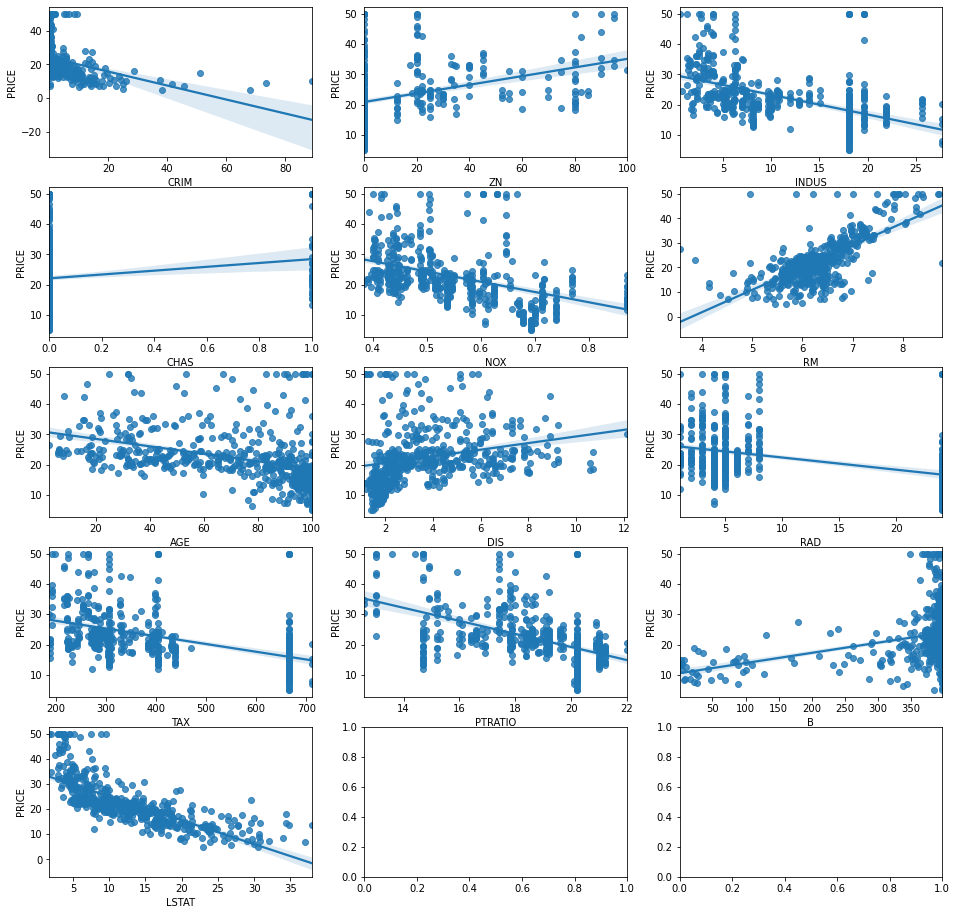

In [73]:
fig, axes = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)

x_features = X_train.columns

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y = 'PRICE', data = df, ax=axes[row][col])